MINING TWITTER

In [2]:
!pip install twitter

     |████████████████████████████████| 61kB 3.2MB/s 


## Authorizing an application to access Twitter account data

In [3]:
import twitter

# Go to https://developer.twitter.com/en/apps to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://developer.twitter.com/en/docs/basics/authentication/overview/oauth
# for more information on Twitter's OAuth implementation.

CONSUMER_KEY = ''#api_key
CONSUMER_SECRET = ''#api_secret
OAUTH_TOKEN = ''#Twitter_access_token
OAUTH_TOKEN_SECRET = ''#Twitter_access_secret

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print(twitter_api)

## Retrieving trends

In [13]:
# Where On Earth ID for the entire world is 1.


WORLD_WOE_ID = 1
IND_WOE_ID = 2282863

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
ind_trends = twitter_api.trends.place(_id=IND_WOE_ID)

print(world_trends)
print()
print(ind_trends)

[{'trends': [{'name': '#SakhirGP', 'url': 'http://twitter.com/search?q=%23SakhirGP', 'promoted_content': None, 'query': '%23SakhirGP', 'tweet_volume': 219377}, {'name': 'Arsenal', 'url': 'http://twitter.com/search?q=Arsenal', 'promoted_content': None, 'query': 'Arsenal', 'tweet_volume': 299216}, {'name': 'Russell', 'url': 'http://twitter.com/search?q=Russell', 'promoted_content': None, 'query': 'Russell', 'tweet_volume': 131276}, {'name': 'Browns', 'url': 'http://twitter.com/search?q=Browns', 'promoted_content': None, 'query': 'Browns', 'tweet_volume': 62002}, {'name': '#TOTARS', 'url': 'http://twitter.com/search?q=%23TOTARS', 'promoted_content': None, 'query': '%23TOTARS', 'tweet_volume': 71943}, {'name': 'Bottas', 'url': 'http://twitter.com/search?q=Bottas', 'promoted_content': None, 'query': 'Bottas', 'tweet_volume': 65409}, {'name': 'Checo', 'url': 'http://twitter.com/search?q=Checo', 'promoted_content': None, 'query': 'Checo', 'tweet_volume': 63235}, {'name': '#AdoreYouDay', 'url'

In [14]:
for trend in world_trends[0]['trends']:
    print(trend['name'])

#SakhirGP
Arsenal
Russell
Browns
#TOTARS
Bottas
Checo
#AdoreYouDay
Baker
Kane
Arteta
#DNZvFB
#COYS
Hamilton
Titans
Spurs
Bellerin
Mourinho
Xhaka
Ocon
Willian
Ali Palabıyık
Altay
Tottenham
Jets
Wakanim
Auba
Partey
Fenerbahçe
Red Bull
Ozil
Leclerc
Racing Point
JAKE NO FARO
Ferrari
Lewis
Verstappen
Şerefsizlik VAR
Stroll
Albon
Falcons
Jose
Viva México
Lacazette
Vardy
Eroda
Saka
Sainz
Circuit City
AJ Brown


In [15]:
for trend in ind_trends[0]['trends']:
    print(trend['name'])

#BahrainGP
#FarmLaws2020
#hardikpandya
apmc
#FarmerPolitics
Dhoni
#SakhirGP
Arsenal
Perez
Checo
Russell
Arteta
Bottas
Mourinho
Bellerin
Kane
Willian
Spurs
Ocon
RAHUL VAIDYA MATTERS
Xhaka
Racing Point
Auba
Hamilton
Partey
BTS IS 7
Kim Taehyung
Ozil
Tottenham
Saka
Red Bull
Lewis
Tierney
40M KHILADIANs ON TWITTER
Ferrari
Anfield
Yogendra Yadav
jyugal
Wenger
Eroda
Sunny Deol
बहादुर जंग
Lacazette
joonie
Gabriel
Nelson
Hobi
Vettel
अली खान


In [16]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

ind_trends_set = set([trend['name'] 
                     for trend in ind_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(ind_trends_set)

print(common_trends)

{'Checo', 'Bellerin', 'Arteta', 'Willian', 'Russell', 'Mourinho', 'Red Bull', 'Racing Point', 'Saka', 'Lewis', 'Auba', 'Tottenham', 'Xhaka', 'Ferrari', 'Hamilton', 'Bottas', 'Arsenal', 'Eroda', 'Spurs', '#SakhirGP', 'Lacazette', 'Ocon', 'Kane', 'Partey', 'Ozil'}


## Anatomy of a Tweet

In [17]:
import json

# Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.

q = '#FarmLaws2020' 

count = 100

# Import unquote to prevent url encoding errors in next_results
from urllib.parse import unquote

# See https://dev.twitter.com/rest/reference/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor
for _ in range(5):
    print('Length of statuses', len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23RIPSelena&count=100&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print(json.dumps(statuses[0], indent=1))

Length of statuses 100
Length of statuses 200
Length of statuses 300
Length of statuses 400
Length of statuses 500
{
 "created_at": "Sun Dec 06 19:21:20 +0000 2020",
 "id": 1335665649234956291,
 "id_str": "1335665649234956291",
 "text": "RT @IndiaToday: British Sikhs gathered to protest against India's new farming legislation, outside the High Commission of India in London,\u2026",
 "truncated": false,
 "entities": {
  "hashtags": [],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "IndiaToday",
    "name": "IndiaToday",
    "id": 19897138,
    "id_str": "19897138",
    "indices": [
     3,
     14
    ]
   }
  ],
  "urls": []
 },
 "metadata": {
  "iso_language_code": "en",
  "result_type": "recent"
 },
 "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>",
 "in_reply_to_status_id": null,
 "in_reply_to_status_id_str": null,
 "in_reply_to_user_id": null,
 "in_reply_to_user_id_str": null,
 "in_reply_to_screen_name": null,
 "user

In [18]:
for i in range(10):
    print()
    print(statuses[i]['text'])
    print('Favorites: ', statuses[i]['favorite_count'])
    print('Retweets: ', statuses[i]['retweet_count'])


RT @IndiaToday: British Sikhs gathered to protest against India's new farming legislation, outside the High Commission of India in London,…
Favorites:  0
Retweets:  57

RT @YayathiPuru: Gujarat farmers announce formation of a campaign against the #FarmLaws2020 and announce support to #BharatBandh on 8th Dec…
Favorites:  0
Retweets:  99

RT @aruna_dk: Farmers from Rajasthan and Madhya Pradesh extend their support to new farm laws, say they are getting more price and incurrin…
Favorites:  0
Retweets:  8

RT @MrsGandhi: Farmers across the country are extremely satisfied &amp; very optimistic about the #FarmLaws2020 brought in by the Modi govt. Li…
Favorites:  0
Retweets:  934

RT @HarshVardhanTri: यक़ीन मानिए, जितना लंबा पंजाब के बड़े किसानों का आंदोलन चलेगा, उतना ज़्यादा देश के आम किसानों को कृषि क़ानूनों से होने…
Favorites:  0
Retweets:  56

RT @barandbench: Bar Council of India extends support to farmers protests and Bharat Bandh on December 8.

#FarmersProtest
#FarmLaws2020 #F…
Favor

## Extracting text, screen names, and hashtags from tweets

In [19]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print(json.dumps(status_texts[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1) )
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "RT @IndiaToday: British Sikhs gathered to protest against India's new farming legislation, outside the High Commission of India in London,\u2026",
 "RT @YayathiPuru: Gujarat farmers announce formation of a campaign against the #FarmLaws2020 and announce support to #BharatBandh on 8th Dec\u2026",
 "RT @aruna_dk: Farmers from Rajasthan and Madhya Pradesh extend their support to new farm laws, say they are getting more price and incurrin\u2026",
 "RT @MrsGandhi: Farmers across the country are extremely satisfied &amp; very optimistic about the #FarmLaws2020 brought in by the Modi govt. Li\u2026",
 "RT @HarshVardhanTri: \u092f\u0915\u093c\u0940\u0928 \u092e\u093e\u0928\u093f\u090f, \u091c\u093f\u0924\u0928\u093e \u0932\u0902\u092c\u093e \u092a\u0902\u091c\u093e\u092c \u0915\u0947 \u092c\u0921\u093c\u0947 \u0915\u093f\u0938\u093e\u0928\u094b\u0902 \u0915\u093e \u0906\u0902\u0926\u094b\u0932\u0928 \u091a\u0932\u0947\u0917\u093e, \u0909\u0924\u0928\u093e \u091c\u093c\u094d\u092f\u093e\u09

## Creating a basic frequency distribution from the words in tweets

In [20]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()

[('RT', 477), ('the', 394), ('of', 269), ('from', 228), ('@DDNewslive:', 223), ('for', 216), ('Maharashtra', 213), ('Farmer', 207), ('says', 207), ('#FarmLaws2020', 198)]

[('DDNewslive', 223), ('MrsGandhi', 21), ('HarshVardhanTri', 18), ('YayathiPuru', 16), ('barandbench', 16), ('Naushad9783', 16), ('DDNewsHindi', 16), ('narendramodi', 12), ('PTTVOnlineNews', 11), ('lucky_s_chawla', 9)]

[('FarmLaws2020', 210), ('FarmersProtest', 38), ('BharatBandh', 21), ('FarmBill', 17), ('FarmersWithModi', 16), ('FarmersProtest2020', 13), ('FarmersPortest', 10), ('IamWithFarmers', 9), ('JUSTIN', 9), ('Farmers', 9)]



## Using prettytable to display tuples in a nice tabular format

In [21]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+---------------+-------+
| Word          | Count |
+---------------+-------+
| RT            |   477 |
| the           |   394 |
| of            |   269 |
| from          |   228 |
| @DDNewslive:  |   223 |
| for           |   216 |
| Maharashtra   |   213 |
| Farmer        |   207 |
| says          |   207 |
| #FarmLaws2020 |   198 |
+---------------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| DDNewslive      |   223 |
| MrsGandhi       |    21 |
| HarshVardhanTri |    18 |
| YayathiPuru     |    16 |
| barandbench     |    16 |
| Naushad9783     |    16 |
| DDNewsHindi     |    16 |
| narendramodi    |    12 |
| PTTVOnlineNews  |    11 |
| lucky_s_chawla  |     9 |
+-----------------+-------+
+--------------------+-------+
| Hashtag            | Count |
+--------------------+-------+
| FarmLaws2020       |   210 |
| FarmersProtest     |    38 |
| BharatBandh        |    21 |
| FarmBill           |    17 |
| FarmersWithModi    |    1

## Calculating lexical diversity for tweets

In [22]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return total_words/len(statuses)

print(lexical_diversity(words))
print(lexical_diversity(screen_names))
print(lexical_diversity(hashtags))
print(average_words(status_texts))

0.17372440124956612
0.25
0.2453781512605042
19.206666666666667


## Finding the most popular retweets

In [23]:
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['retweeted_status']['id'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if 'retweeted_status' in status.keys()
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Tweet ID', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

+-------+-------------+---------------------+----------------------------------------------------+
| Count | Screen Name | Tweet ID            | Text                                               |
+-------+-------------+---------------------+----------------------------------------------------+
| 934   | MrsGandhi   | 1335525434566475785 | RT @MrsGandhi: Farmers across the country are      |
|       |             |                     | extremely satisfied &amp; very optimistic about    |
|       |             |                     | the #FarmLaws2020 brought in by the Modi govt. Li… |
| 934   | MrsGandhi   | 1335525434566475785 | RT @MrsGandhi: Farmers across the country are      |
|       |             |                     | extremely satisfied &amp; very optimistic about    |
|       |             |                     | the #FarmLaws2020 brought in by the Modi govt. Li… |
| 934   | MrsGandhi   | 1335525434566475785 | RT @MrsGandhi: Farmers across the country are      |
|       | 

## Looking up users who have retweeted a status

In [24]:
# Get the original tweet id for a tweet from its retweeted_status node 
# and insert it here

_retweets = twitter_api.statuses.retweets(id=862359093398261760)
print([r['user']['screen_name'] for r in _retweets])

['vijoumolce1988', 'driftourare1988', 'NoNicheNC', 'livingmybestie', 'Rockawaytheday']


## Plotting frequencies of words

Text(0.5, 0, 'Word Rank')

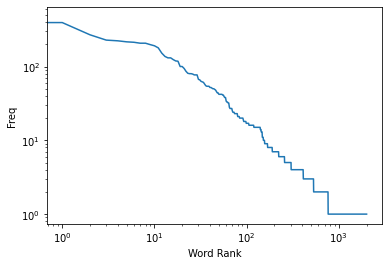

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

## Generating histograms of words, screen names, and hashtags

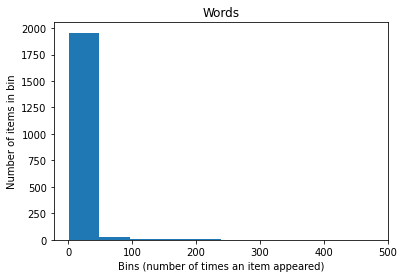

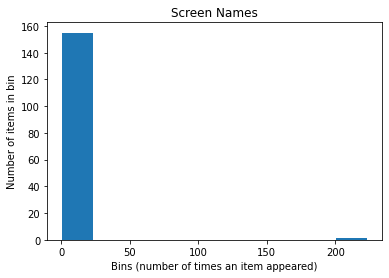

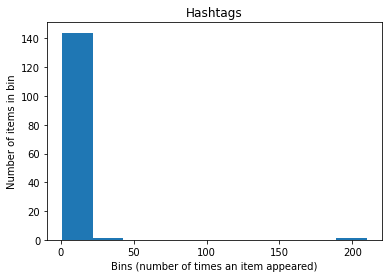

<Figure size 432x288 with 0 Axes>

In [26]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(list(c.values()))
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()

## Generating a histogram of retweet counts

Text(0, 0.5, 'Number of tweets in bin')

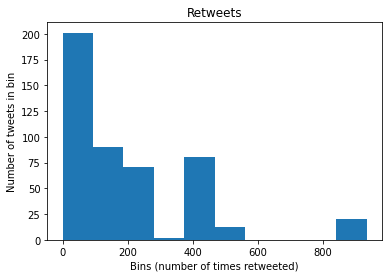

In [27]:
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

counts = [count for count, _, _, _ in retweets]

plt.hist(counts)
plt.title('Retweets')
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')

## Sentiment Analysis

In [28]:
# pip install nltk
import nltk
nltk.download('vader_lexicon')

import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [29]:
twitter_stream = twitter.TwitterStream(auth=auth)
iterator = twitter_stream.statuses.sample()

In [30]:
tweets = []
for tweet in iterator:
    try:
        if tweet['lang'] == 'en':
            tweets.append(tweet)
    except:
        pass
    if len(tweets) == 100:
        break

In [31]:
analyzer = SentimentIntensityAnalyzer()

In [32]:
analyzer.polarity_scores('Hello')

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [33]:
analyzer.polarity_scores('I really enjoy this video series.')

{'compound': 0.5413, 'neg': 0.0, 'neu': 0.534, 'pos': 0.466}

In [34]:
analyzer.polarity_scores('I REALLY enjoy this video series.')

{'compound': 0.64, 'neg': 0.0, 'neu': 0.486, 'pos': 0.514}

In [35]:
analyzer.polarity_scores('I REALLY enjoy this video series!!!')

{'compound': 0.7271, 'neg': 0.0, 'neu': 0.439, 'pos': 0.561}

In [36]:
analyzer.polarity_scores('I REALLY did not enjoy this video series!!!')

{'compound': -0.6627, 'neg': 0.425, 'neu': 0.575, 'pos': 0.0}

In [37]:
scores = np.zeros(len(tweets))

for i, t in enumerate(tweets):
    # Extract the text portion of the tweet
    text = t['text']
    
    # Measure the polarity of the tweet
    polarity = analyzer.polarity_scores(text)
    
    # Store the normalized, weighted composite score
    scores[i] = polarity['compound']

In [38]:
most_positive = np.argmax(scores)
most_negative = np.argmin(scores)

In [39]:
print('{0:6.3f} : "{1}"'.format(scores[most_positive], tweets[most_positive]['text']))

 0.909 : "RT @Mhollstein: My short story, Mystery of the Beautiful Old Friend, is a FREE Kindle ebook through Saturday, December 5th!  
https://t.co/…"


In [40]:
print('{0:6.3f} : "{1}"'.format(scores[most_negative], tweets[most_negative]['text']))

-0.848 : "I started crying when Sanam's eviction was announced and i kept crying till she left. 

Sanam you are my Queen. I o… https://t.co/qoJy0IT53K"
